# Examen 1

## Importaciones necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import random
from scipy import optimize as opt

## Punto 1

JSON de nombre "countries.json" descargado del siguiente link:
https://gist.githubusercontent.com/keeguon/2310008/raw/bdc2ce1c1e3f28f9cab5b4393c7549f38361be4e/countries.

In [2]:
CountriesAPI = "https://inspirehep.net/api/institutions?q=chile"
DatosPais = pd.read_json(CountriesAPI)

Paso por toda la informacion optenida para poder saber cuales tienen paper mayores a 0

In [3]:
opciones = []
for i in range(0, len(DatosPais["hits"]["hits"])):
    validador = DatosPais["hits"]["hits"][i]["metadata"]["number_of_papers"]
    if validador > 0:
        opciones.append(i)

La primera opcion contiene los papers, por ende cumple con las condiciones para buscarle el "legacy_ICN"

In [4]:
DatosPais["hits"]["hits"][opciones[5]]["metadata"]["number_of_papers"]

110

Obteniendo la informacion de "legacy_ICN"

In [5]:
legacy_ICN = DatosPais["hits"]["hits"][opciones[0]]["metadata"]["legacy_ICN"]
legacy_ICN

'U. Chile, Santiago'

In [6]:
ajuste_legacy_ICN = legacy_ICN[0:21].replace(" ","+")
ajuste_legacy_ICN

'U.+Chile,+Santiago'

Descargando el siguiente archivo JSON, con los artículos de menos de 10 autores usando el "legacy_ICN"

In [7]:
AuthorsAPI = "https://inspirehep.net/api/literature?page=1&q=aff+U.+Chile,+Santiago+and+ac+1-%3E+10"
DatosAuthor = pd.read_json(AuthorsAPI)

In [8]:
DatosAuthor["hits"]["hits"][2]["metadata"]["authors"][0]["record"]["$ref"]

'https://inspirehep.net/api/authors/1757371'

Busqueda y creación del dataframe

In [9]:
NombreAuthor = []
CorreoAuthor = []
# No entendi este asi que no sé que buscar exactamente
Position = []
# --------------
Rango = []
Institution = []
FechaInicio = []
FechaFinalizacion = []

In [10]:
for i in range(0,len(DatosAuthor["hits"]["hits"])):
    for j in range(0,len(DatosAuthor["hits"]["hits"][i]["metadata"]["authors"])):
        NombreAuthor.append(DatosAuthor["hits"]["hits"][i]["metadata"]["authors"][j]["full_name"])
        try:
            LinkAuthor = DatosAuthor["hits"]["hits"][i]["metadata"]["authors"][j]["record"]["$ref"]
            try:
                CorreoAuthor.append(pd.read_json(LinkAuthor)["metadata"]["email_addresses"][0]["value"])
            except KeyError:
                CorreoAuthor.append(' - ')
            try:
                Rango.append(pd.read_json(LinkAuthor)["metadata"]["positions"][0]["rank"])
            except KeyError:
                Rango.append(' - ')
            try:
                Institution.append(pd.read_json(LinkAuthor)["metadata"]["positions"][0]["institution"])
            except KeyError:
                Institution.append(' - ') 
            try:
                FechaInicio.append(pd.read_json(LinkAuthor)["metadata"]["positions"][0]["start_date"])
            except KeyError:
                FechaInicio.append(' - ')
            try:
                FechaFinalizacion.append(pd.read_json(LinkAuthor)["metadata"]["positions"][0]["end_date"])
            except KeyError:
                FechaFinalizacion.append(' - ') 
        except KeyError:
            CorreoAuthor.append('Sin acceso a $ref')
            Rango.append('Sin acceso a $ref')
            Institution.append("Sin acceso a $ref")
            FechaInicio.append('Sin acceso a $ref')
            FechaFinalizacion.append('Sin acceso a $ref')

In [11]:
print("Correo: ",len(CorreoAuthor))
print("Nombre: ",len(NombreAuthor))
print("Rango: ",len(Rango))
print("Insti: ",len(Institution))
print("Inicio: ",len(FechaInicio))
print("Final: ",len(FechaFinalizacion))

Correo:  25
Nombre:  25
Rango:  25
Insti:  25
Inicio:  25
Final:  25


In [12]:
ResumenDeLosDatos = {"Nombre":NombreAuthor,"Correo":CorreoAuthor,"Rango":Rango,"Institución":Institution,"Fecha de inicio":FechaInicio,"Fecha de finalizacion":FechaFinalizacion}

In [13]:
ElDataFrame = pd.DataFrame(ResumenDeLosDatos)
ElDataFrame

,Nombre,Correo,Rango,Institución,Fecha de inicio,Fecha de finalizacion
0,"Khadka, Narayan",nkhadka@phys.ksu.edu,PHD,"Kansas State U., Manhattan",-,-
1,"Martínez-Aldama, Mary Loli",-,-,-,-,-
2,"Zajaček, Michal",-,-,"Masaryk U., Brno",-,-
3,"Czerny, Bożena",bcz@cft.edu.pl,SENIOR,"Warsaw, CFT",2015,-
4,"Ratra, Bharat",ratra@phys.ksu.edu,SENIOR,Kansas State U.,1996,-
5,"Barron, Katrina",kbarron@nd.edu,JUNIOR,Notre Dame U.,2001,-
6,"Batistelli, Karina",-,-,-,-,-
7,"Hunziker, Florencia Orosz",-,-,-,-,-
8,"Tomic, Veronika Pedic",-,-,-,-,-
9,"Yamskulna, Gaywalee",-,-,-,-,-


## Punto 2

Genere un polinomio de numpy con 3 raices reales aleatorias entre los dos últimos números diferentes de su identificación (Ejemplo: 98554575 → 3 raices reales aleatorias  entre 5 y 7 )

Cedula: 1214748203 -> 0 y 3

In [14]:
coef1 = random.uniform(0,3)
coef2 = random.uniform(0,3)
coef3 = random.uniform(0,3)

print("Raiz 1: ",coef1)
print("Raiz 2: ",coef2)
print("Raiz 3: ",coef3)

Raiz 1:  1.6927074320223867
Raiz 2:  0.10643856330734802
Raiz 3:  2.5286829775409627


Polinomio principal

In [15]:
Poli_3raiz = np.poly1d([1, (-1)*(coef1+coef2+coef3), coef1*coef2 + coef1*coef3 + coef2*coef3,(-1)*coef1*coef2*coef3])

In [16]:
Valx = np.linspace(0,4,100)

In [17]:
Valy = Poli_3raiz(Valx)

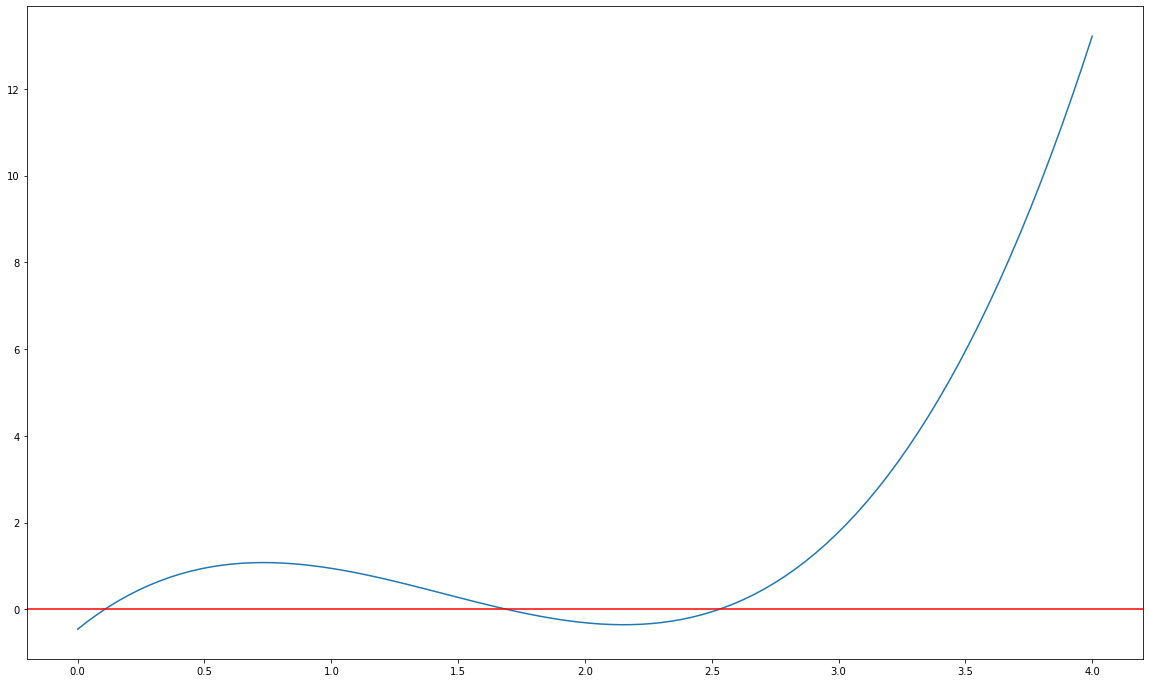

In [18]:
plt.figure(figsize=(20,12))
plt.plot(Valx,Valy)
plt.axhline(0,color="red")
plt.show()

In [19]:
Raiz1_a = 0
Raiz1_b = 0.1
for i in range(0,30):
    if (Poli_3raiz(Raiz1_a) < 0 and Poli_3raiz(Raiz1_b) > 0) or (Poli_3raiz(Raiz1_a) > 0 and Poli_3raiz(Raiz1_b) < 0):
        pass
    else:
        Raiz1_b = Raiz1_b + 0.1
Raiz1 = opt.bisect(Poli_3raiz,Raiz1_a,Raiz1_b)

Raiz2_a = Raiz1_b
Raiz2_b = Raiz2_a + 0.1
for i in range(0,30):
    if (Poli_3raiz(Raiz2_a) < 0 and Poli_3raiz(Raiz2_b) > 0) or (Poli_3raiz(Raiz2_a) > 0 and Poli_3raiz(Raiz2_b) < 0):
        pass
    else:
        Raiz2_b = Raiz2_b + 0.1
Raiz2 = opt.bisect(Poli_3raiz,Raiz2_a,Raiz2_b)

Raiz3_a = Raiz2_b
Raiz3_b = Raiz3_a + 0.1
for i in range(0,30):
    if (Poli_3raiz(Raiz3_a) < 0 and Poli_3raiz(Raiz3_b) > 0) or (Poli_3raiz(Raiz3_a) > 0 and Poli_3raiz(Raiz3_b) < 0):
        pass
    else:
        Raiz3_b = Raiz3_b + 0.1
Raiz3 = opt.bisect(Poli_3raiz,Raiz3_a,Raiz3_b)

In [30]:
print("Primera raiz: ",Raiz1)
print("Segunda raiz: ",Raiz2)
print("Tercera raiz: ",Raiz3)

Primera raiz:  0.10643856330862038
Segunda raiz:  1.692707432021689
Tercera raiz:  2.5286829775412127


derivada del polinomio

In [20]:
Deri_Poli = Poli_3raiz.deriv()
Valy_deri = Deri_Poli(Valx)

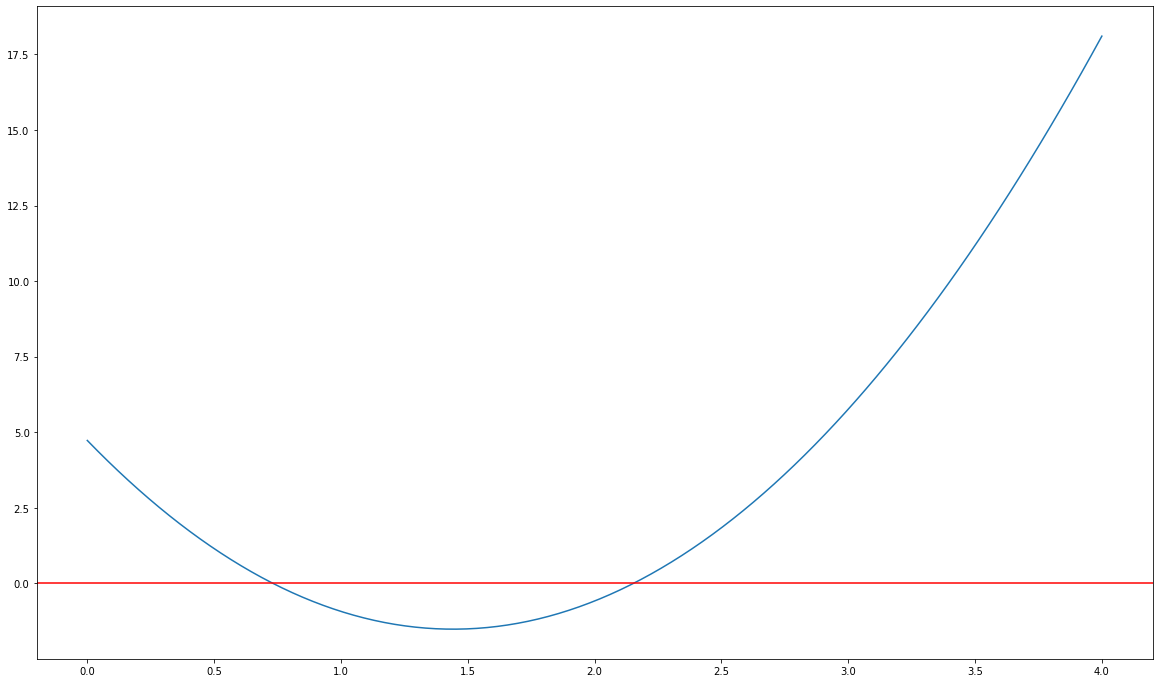

In [21]:
plt.figure(figsize=(20,12))
plt.plot(Valx,Valy_deri)
plt.axhline(0,color="red")
plt.show()

dada la grafica anterior, podemos decir que tenemos raices entre [1.6,1.8], [2,2.2]

In [22]:
RaizDeri1_a = 0
RaizDeri1_b = 0.1
for i in range(0,30):
    if (Deri_Poli(RaizDeri1_a) < 0 and Deri_Poli(RaizDeri1_b) > 0) or (Deri_Poli(RaizDeri1_a) > 0 and Deri_Poli(RaizDeri1_b) < 0):
        pass
    else:
        RaizDeri1_b = RaizDeri1_b + 0.1
RaizDeri1 = opt.bisect(Deri_Poli,RaizDeri1_a,RaizDeri1_b)

RaizDeri2_a = RaizDeri1_b
RaizDeri2_b = RaizDeri2_a + 0.1
for i in range(0,30):
    if (Deri_Poli(RaizDeri2_a) < 0 and Deri_Poli(RaizDeri2_b) > 0) or (Deri_Poli(RaizDeri2_a) > 0 and Deri_Poli(RaizDeri2_b) < 0):
        pass
    else:
        RaizDeri2_b = RaizDeri2_b + 0.1
RaizDeri2 = opt.bisect(Deri_Poli,RaizDeri2_a,RaizDeri2_b)

In [31]:
print("Primera raiz: ",RaizDeri1)
print("Segunda raiz: ",RaizDeri2)

Primera raiz:  0.7322743675103993
Segunda raiz:  2.1529449477364326


In [23]:
Raices = np.array([Raiz1,Raiz2,Raiz3])
ValRaiz = Poli_3raiz(Raices)

derivada de la derivada (para verificar si es maximo o minimo)

In [24]:
Deri_Deri_Poli = Deri_Poli.deriv()

In [25]:
PuntosCriticos = np.array([RaizDeri1,RaizDeri2])
Valy_deri_deri = Deri_Deri_Poli(PuntosCriticos)
Valy_deri_deri

array([-4.26201174,  4.26201174])

In [26]:
if Valy_deri_deri[0] > 0:
    print("El primer punto critico es un minimo")
else:
    print("El primer punto critico es un maximo")
if Valy_deri_deri[1] > 0:
    print("El segundo punto critico es un minimo")
else:
    print("El segundo punto critico es un maximo")

El primer punto critico es un maximo
El segundo punto critico es un minimo


graficando todos los resultados

Grafica del polinomio y sus dereivadas

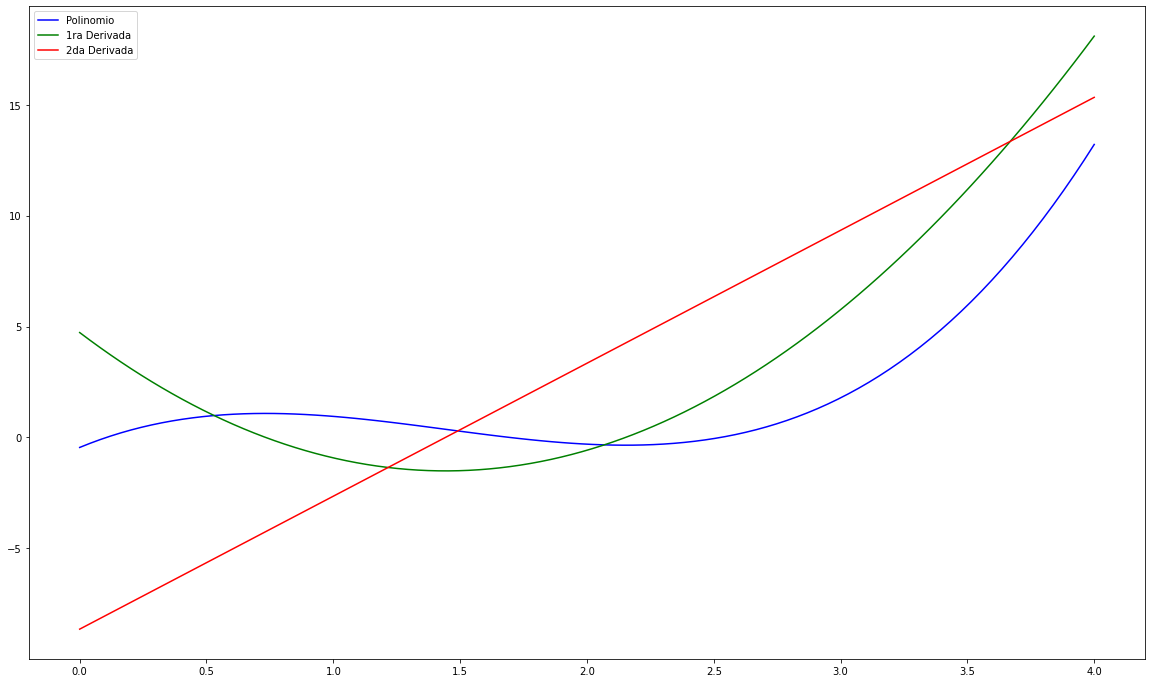

In [27]:
plt.figure(figsize=(20,12))
plt.plot(Valx,Valy,"blue",label="Polinomio")
plt.plot(Valx,Valy_deri,"green",label="1ra Derivada")
plt.plot(Valx,Deri_Deri_Poli(Valx),"red",label="2da Derivada")
plt.legend()
plt.show()

grafica del polinomio y sus raices

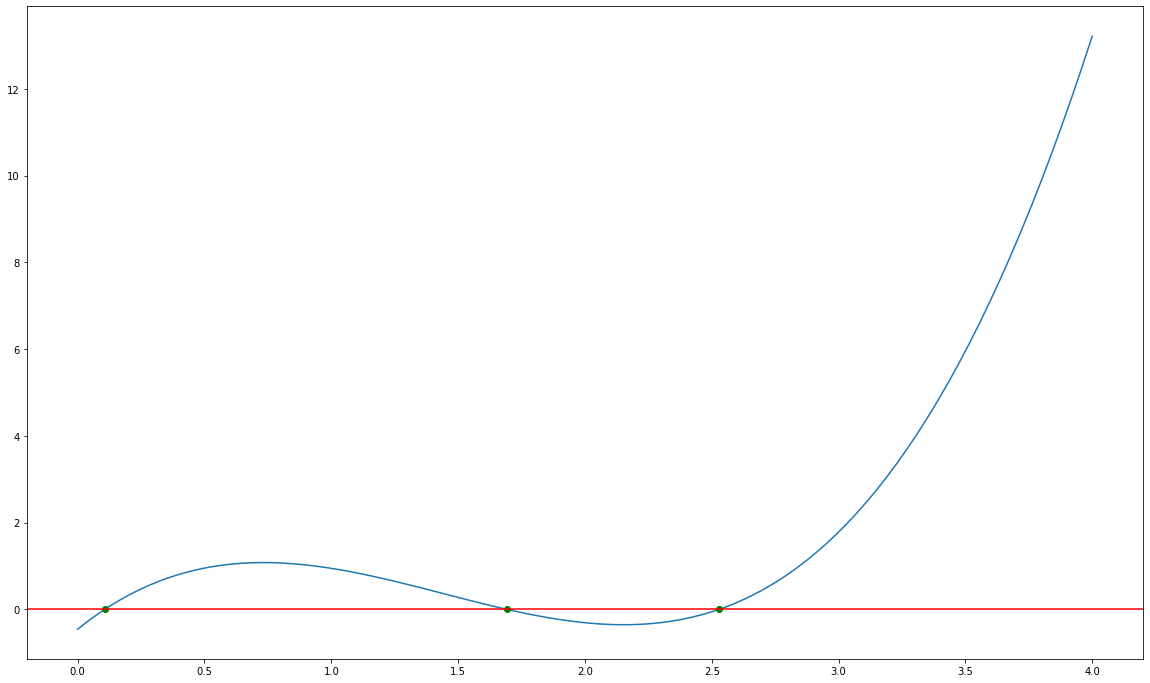

In [28]:
plt.figure(figsize=(20,12))
plt.plot(Valx,Valy)
plt.plot(Raices,ValRaiz,"og")
plt.axhline(0,color="red")
plt.show()


grafica de la derivada y sus raices

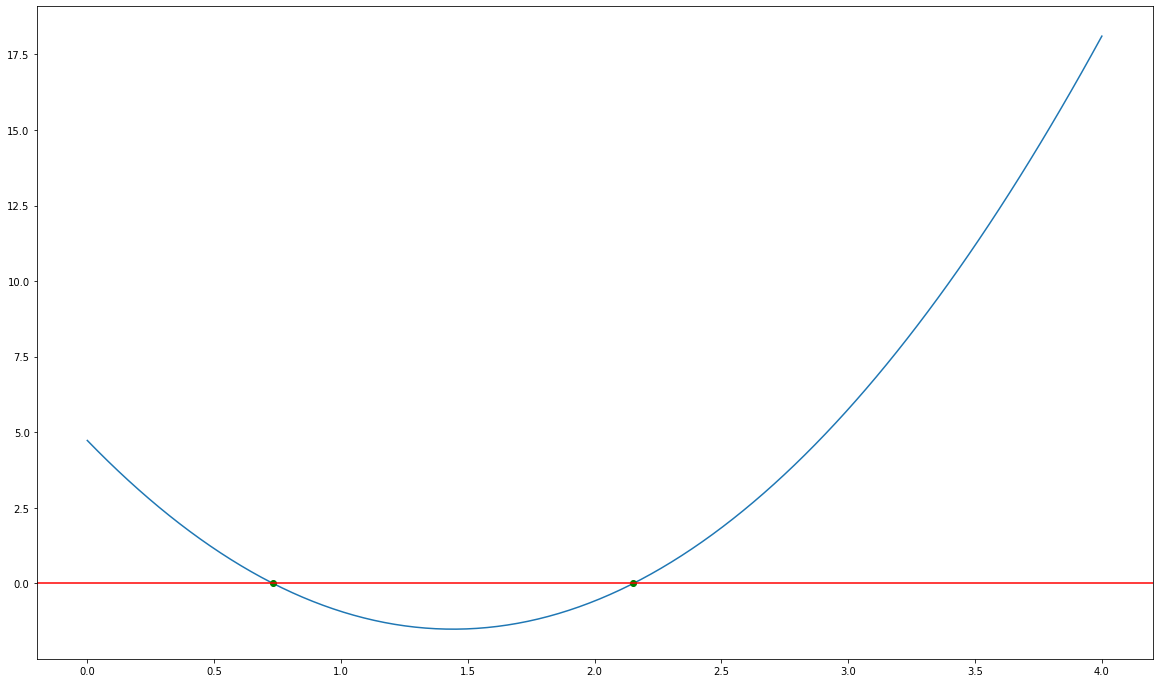

In [29]:
plt.figure(figsize=(20,12))
plt.plot(Valx,Valy_deri)
plt.plot(PuntosCriticos,Deri_Poli(PuntosCriticos),"og")
plt.axhline(0,color="red")
plt.show()